# Gradient Descent

In [27]:
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt 

In [29]:
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500])

print(f'x_train={x_train}')
print(f'y_train={y_train}')

x_train=[1. 2.]
y_train=[300. 500.]


In [30]:
def compute_cost(x: NDArray[np.float64], y: NDArray[np.float64], w: float, b: float) -> float:
    m = x.shape[0]
    
    return sum(float(w*x[i]+b-y[i]) ** 2 for i in range(m)) / (2*m)

In [31]:
def compute_gradient(
    x: NDArray[np.float64], y: NDArray[np.float64], w: float, b: float
) -> tuple[float, float]:
    m = x.shape[0]
    d_dw = sum(float((w * x[i] + b - y[i]) * x[i]) for i in range(m)) / m  
    d_db = sum(float(w * x[i] + b - y[i]) for i in range(m)) / m

    return d_dw, d_db

In [32]:
def gradient_descent(
    x: NDArray[np.float64],
    y: NDArray[np.float64],
    initial_w: float,
    initial_b: float,
    learning_rate: float = 0.01,
    iterations: int = 10_000,
):
    w = initial_w
    b = initial_b
    j_history: list[float] = []  # cost history
    p_history: list[list[float]] = []  # parameters history

    for i in range(iterations):
        d_dw, d_db = compute_gradient(x, y, w, b)
        b = b - learning_rate * d_db
        w = w - learning_rate * d_dw
        cost = compute_cost(x, y, w, b)

        j_history.append(cost)
        p_history.append([w, b])

        if i % (iterations / 10) == 0:
            print(
                f"Iteration {i:4}: Cost {cost:0.2e} ",
                f"dj_dw: {d_dw=: 0.3e}, dj_db: {d_db: 0.3e}  ",
                f"w: {w: 0.3e}, b:{b: 0.5e}",
            )

    return w, b, j_history, p_history

In [33]:
w, b, j_history, p_history = gradient_descent(x_train, y_train, 0, 0, 1.0e-2)
print(f"Final w={w}, Final b={b}")

Iteration    0: Cost 7.93e+04  dj_dw: d_dw=-6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 1000: Cost 3.41e+00  dj_dw: d_dw=-3.712e-01, dj_db:  6.007e-01   w:  1.949e+02, b: 1.08228e+02
Iteration 2000: Cost 7.93e-01  dj_dw: d_dw=-1.789e-01, dj_db:  2.895e-01   w:  1.975e+02, b: 1.03966e+02
Iteration 3000: Cost 1.84e-01  dj_dw: d_dw=-8.625e-02, dj_db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteration 4000: Cost 4.28e-02  dj_dw: d_dw=-4.158e-02, dj_db:  6.727e-02   w:  1.994e+02, b: 1.00922e+02
Iteration 5000: Cost 9.95e-03  dj_dw: d_dw=-2.004e-02, dj_db:  3.243e-02   w:  1.997e+02, b: 1.00444e+02
Iteration 6000: Cost 2.31e-03  dj_dw: d_dw=-9.660e-03, dj_db:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 7000: Cost 5.37e-04  dj_dw: d_dw=-4.657e-03, dj_db:  7.535e-03   w:  1.999e+02, b: 1.00103e+02
Iteration 8000: Cost 1.25e-04  dj_dw: d_dw=-2.245e-03, dj_db:  3.632e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 9000: Cost 2.90e-05  dj_dw: d_dw=-1.082e-03, 

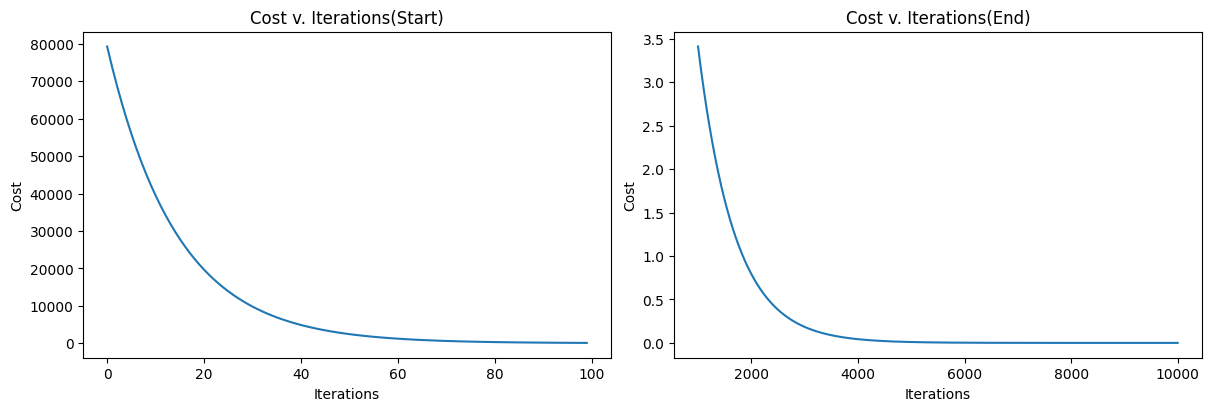

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))

# Example plotting code
ax1.plot(j_history[:100])
ax2.plot(1000 + np.arange(len(j_history[1000:])), j_history[1000:])

ax1.set_title("Cost v. Iterations(Start)")
ax2.set_title("Cost v. Iterations(End)")

ax1.set_ylabel("Cost")
ax2.set_ylabel("Cost")

ax1.set_xlabel("Iterations")
ax2.set_xlabel("Iterations")

plt.show()